In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import unicode_literals
from IPython.core.display import display, HTML

In [2]:
# Global configurations
# ---------------------

# Expand the notebook to the width of the browser
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib style
plt.style.use('seaborn-colorblind')

# Use LaTeX and its body font for the diagrams' text.
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Nimbus Roman Becker No9L']

# Font sizes
SIZE = 24
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-2)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

# Use thinner lines for axes to avoid distractions.
mpl.rcParams['axes.linewidth']    = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.linewidth'] = 2


# Do not use a box for the legend to avoid distractions.
mpl.rcParams['legend.frameon'] = False

# Restore part of matplotlib 1.5 behavior
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['errorbar.capsize'] = 3

# Helpers
# -------

# Use coordinated colors. These are the "Tableau 20" colors as 
# RGB. Each pair is strong/light. For a theory of color    
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21] 
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
  
# Scale the RGB values to the [0, 1] range, which is the format 
# matplotlib accepts.    
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Return a single plot without right and top axes
def fig_setup( num_x=1, num_y=1, 
              size_x=16, size_y=8, 
              space_x=0.25, space_y=0.25):
    
    
    
    fig, axes = plt.subplots(num_x, num_y, figsize=(size_x, size_y), gridspec_kw={'wspace':space_x, 'hspace':space_y}, sharex=False, sharey=False)
    if num_x == 1 and num_y == 1:
        axes = [[axes]]
#         for ax1 in axes:
#             for ax2 in ax1:
#                 ax2.get_xaxis().tick_bottom()  
#                 ax2.get_yaxis().tick_left()
    elif (num_x == 1 and num_y>1) or (num_x>1 and num_y == 1):
        axes = [axes]
#         for ax1 in axes:
#             for ax2 in ax1:
#                 ax2.get_xaxis().tick_bottom()  
#                 ax2.get_yaxis().tick_left()
    return fig, axes

In [3]:
bulks = [1,10,100,1000]
tasks = [10,100,1000,10000,100000]
loc = '../raw-data'
opd = '../plots'

In [5]:
df = pd.DataFrame(columns=tasks, index=bulks)

for t in tasks:
    for b in bulks:
        if b < t:
            sdata = open('%s/bulk-%s-tasks-%s/cud_submission.txt'%(loc,b,t),'r').readlines()
            dur = float(sdata[1].split(':')[1].strip()) - float(sdata[0].split(':')[1].strip())
            df[t][b] = dur         

display(df)

,10,100,1000,10000,100000
1,1.63127,14.4765,136.647,1327.31,12017.3
10,NaN,2.25966,15.693,173.73,1455.09
100,NaN,NaN,6.07363,58.3446,528.425
1000,NaN,NaN,NaN,36.7015,359.01


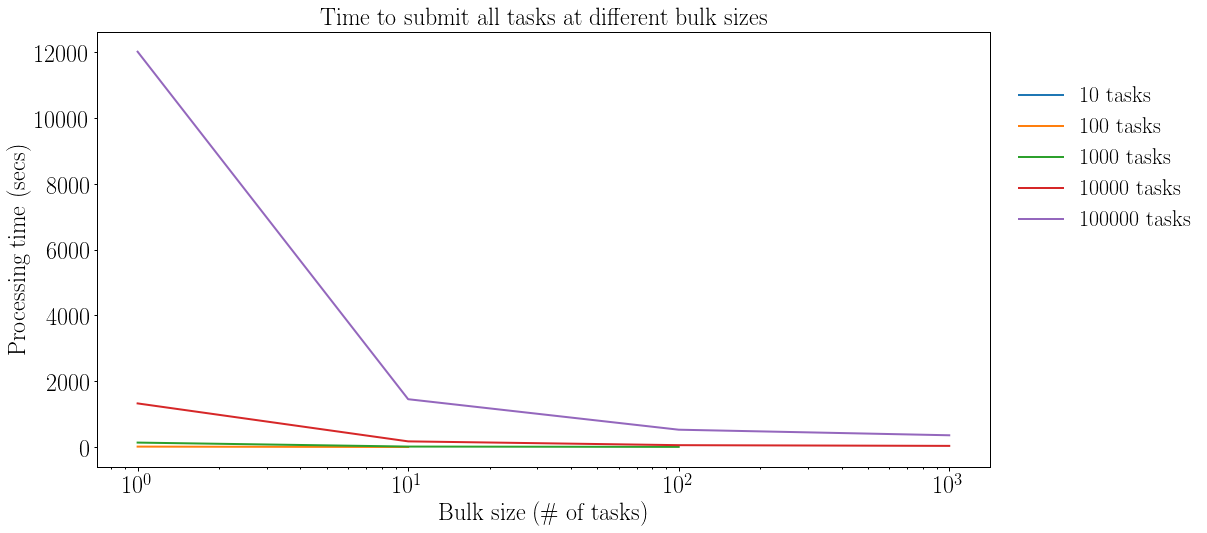

In [8]:
fig, ax = fig_setup(num_x=1,size_x=16, size_y=8, space_y=0.25)

ax1 = df.plot(ax=ax[0][0], 
                    kind='line', 
                    legend=False, 
                    color= [tableau20[0], tableau20[2], tableau20[4],
                            tableau20[6], tableau20[8]]
                )
ax1.set_xlabel('Bulk size (\# of tasks)')
ax1.set_ylabel('Processing time (secs)')
ax1.set_xscale('log',basex=10)
ax1.set_title('Time to submit all tasks at different bulk sizes')

h1, l1 = ax1.get_legend_handles_labels()
# h2, l2 = ax2.get_legend_handles_labels()
handles = h1
labels = [l + ' tasks' for l in l1]
plt.legend(handles, labels, loc = 'lower center', bbox_to_anchor = (0.5,0.5,1,1), bbox_transform = plt.gcf().transFigure, ncol=1)

In [95]:
print df_agg

         10        100        1000      10000    100000   1000000
1     0.00888205  0.074182   0.643271   6.80946  69.1422  746.082
10           NaN  0.010556   0.087549  0.883272  9.43799  106.231
100          NaN       NaN  0.0379188  0.306024  3.20154  35.8584
1000         NaN       NaN        NaN  0.273533  2.53773  27.1076


In [112]:
df_speedup = pd.DataFrame(columns=tasks, index=bulks[1:])
df_speedup.loc[10] = df_agg.loc[1]/df_agg.loc[10]
df_speedup.loc[100] = df_agg.loc[1]/df_agg.loc[100]
df_speedup.loc[1000] = df_agg.loc[1]/df_agg.loc[1000]
display(df_speedup)

,10,100,1000,10000,100000,1000000
10,NaN,7.02749,7.34756,7.70935,7.32595,7.02317
100,NaN,NaN,16.9644,22.2514,21.5966,20.8064
1000,NaN,NaN,NaN,24.8944,27.2457,27.523


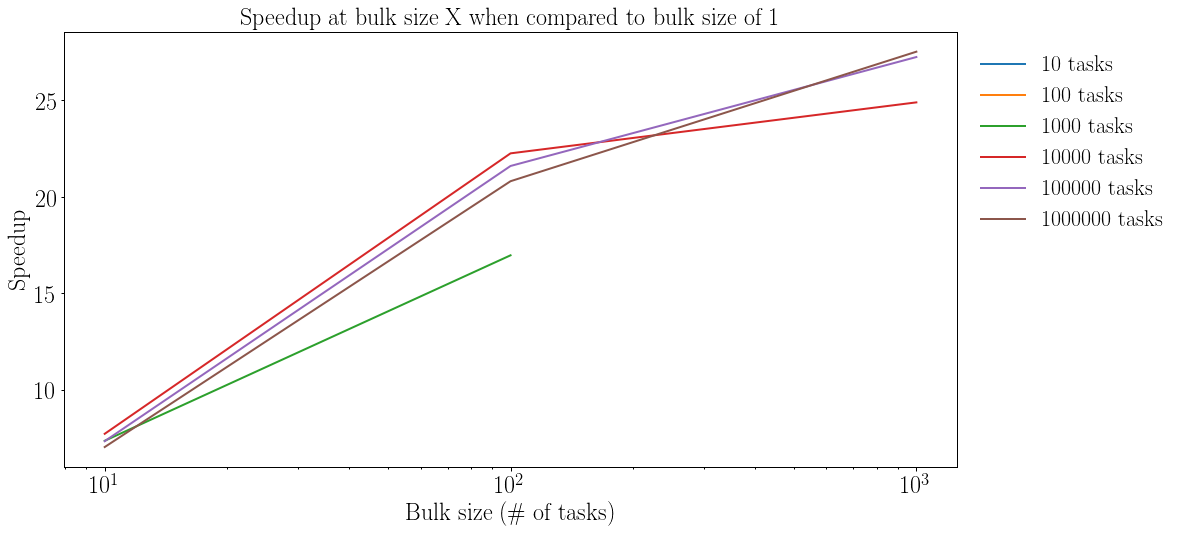

In [113]:
fig, ax = fig_setup(num_x=1)

ax1 = df_speedup.plot(  ax=ax[0][0], 
                        kind='line', 
                        legend=False, 
                        color= [tableau20[0], tableau20[2], tableau20[4],
                                tableau20[6], tableau20[8], tableau20[10]]
                    )
ax1.set_xlabel('Bulk size (\# of tasks)')
ax1.set_ylabel('Speedup')
ax1.set_xscale('log',basex=10)
ax1.set_title('Speedup at bulk size X when compared to bulk size of 1')
h1, l1 = ax1.get_legend_handles_labels()
handles = h1
labels = [l + ' tasks' for l in l1]
plt.legend(handles, labels, loc = 'lower center', bbox_to_anchor = (0.5,0.5,1,1), bbox_transform = plt.gcf().transFigure, ncol=1)